# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
phrm_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
print(phrm_df.shape)
phrm_df.head()

# Display the data table for preview


(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#1.  column(s)
#1.1 one as series: df['col1'] #cmd+/ to highlight
# 1.2 0, 1, more as dataframe: index on list of columns
# col_list = ['col1', 'col2']
# df[col_list]
# NOTE: can be written "inline" as df[['col1', 'col2']]: this is not "double-bracket", it is simply a list inside of an index operator

# 2.  row(s): .loc / .iloc
# 2.1 df.loc[rowspec, colspec] (colspec is optional): uses the actual row/column names
# 2.2 df.iloc[rowspec, colspec] (colspec is optional): uses integers

# 3. Filtering by a series of booleans
# MIN_PASSING_SCORE = 70
# passing_math_s = df['math_score'] >= MIN_PASSING_SCORE

# 3.1 to get all columns:
# df[passing_math_s] *OR* df.loc[passing_math_s]

# 3.2 to get certain columns (.loc is preferred)
# df[passing_math_s][colspec] *OR* df.loc[passing_math_s, colspec]

In [3]:
# Checking the number of mice.
phrm_df['Mouse ID'].nunique()


249

In [4]:
1893 / 249

7.602409638554217

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_row_series = phrm_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
bad_mice = phrm_df[duplicated_row_series]['Mouse ID'].unique()

In [6]:
# Optional: Get all the data for the duplicate mouse IDs. 
test_mouse_filter_series = phrm_df['Mouse ID'].isin(bad_mice)
phrm_df[test_mouse_filter_series].shape


(13, 8)

In [7]:
# Create a clean DataFrame by dropping the duplicate mice. #~ not operator
#~test_mouse_filter_series 
clean_df = phrm_df[~test_mouse_filter_series]
clean_df
del phrm_df

In [8]:
# Checking the number of mice in the clean DataFrame.
mice_df = clean_df['Mouse ID']
#mice_df.nunique()
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame().rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().to_frame().rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume (mm3)'})
regimen_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof = 0).to_frame().rename(columns={'Tumor Volume (mm3)': 'Tumor Variance'})
regimen_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof = 0).to_frame().rename(columns={'Tumor Volume (mm3)': 'Tumor Standard Deviation'})
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().to_frame().rename(columns={'Tumor Volume (mm3)': 'StDv Error'})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df1 = pd.merge(regimen_mean, regimen_median, on='Drug Regimen')
df2 = pd.merge(regimen_var, regimen_std, on='Drug Regimen')
no_sem_df = pd.merge(df1, df2, on='Drug Regimen')
regimen_df = pd.merge(no_sem_df, regimen_sem, on='Drug Regimen')
regimen_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Variance,Tumor Standard Deviation,StDv Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

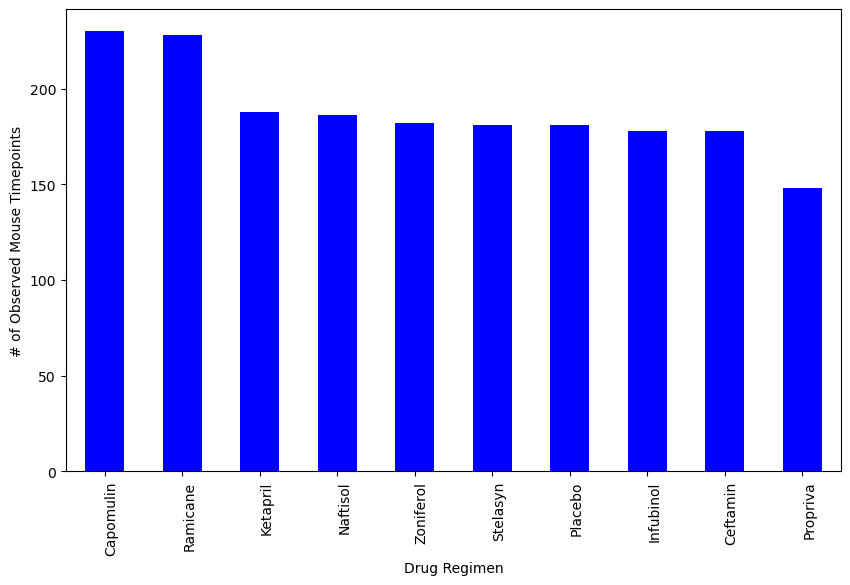

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#n_regimen_df = clean_df.groupby('Drug Regimen').count() #n for number of rows 

n_regimen = clean_df["Drug Regimen"]
n_regimen_using_pd = n_regimen.value_counts()
# Configure plot, figsize, title, and axis labels
figure1 = n_regimen_using_pd.plot(kind="bar", facecolor="blue", figsize=(10,6),
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

# Configure x-tick rotation
xticklabels = n_regimen_using_pd.index
figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

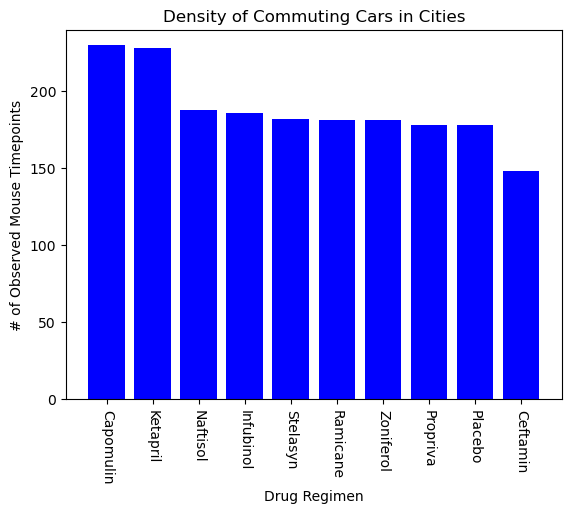

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#plt.bar(clean_df.groupby('Drug Regimen'), n_regimen, data=n_regimen_df)
#plt.xlabel('Drug Regimen')
#plt.ylabel('Total Row Amount')
drug_regimen = n_regimen.unique() #the x values
y_values = n_regimen_using_pd.values #the y values
x_axis = np.arange(len(n_regimen.unique()))

plt.bar(x_axis, y_values, color="b", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation = 270)

plt.ylim(0, max(y_values)+10)
plt.title("Density of Commuting Cars in Cities")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

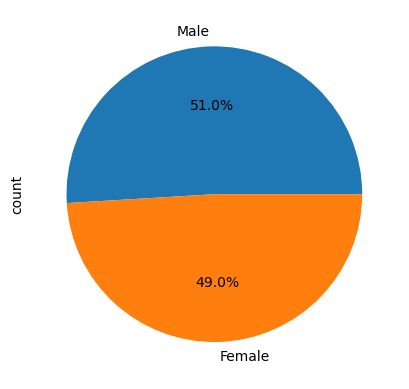

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_df["Sex"].value_counts()
male_female.plot.pie(autopct='%1.1f%%')
plt.show()

In [14]:
male_female = clean_df['Sex'].value_counts()
male_female


Sex
Male      958
Female    922
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1681b00d0>,
 [Text(-0.681404241901343, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370961, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

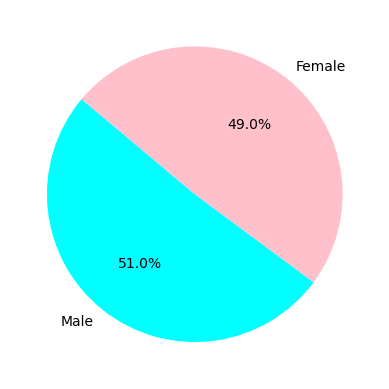

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Configure plot, figsize, title, and axis labels
#Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
male_n = int(clean_df["Sex"].value_counts()['Male'])
fem_n = int(clean_df["Sex"].value_counts()['Female'])
amounts = [male_n, fem_n]

# The colors of each section of the pie chart
colors = ["cyan", "pink"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(amounts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

## Quartiles, Outliers and Boxplots 
### (final tumor volume of each mouse across the 4 most promising treatment regimens)  

In [15]:
# Start by getting the last (greatest) timepoint for each mouse as a DataFrame
#count, sum, avg, min, max = 5 main aggregate functions #.reset_index makes series into DataFrame
final_timepoint_df = clean_df.groupby(['Mouse ID']).max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint for each mouse
final_df = final_timepoint_df.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels) # Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
#for each promising drug
for index, row in final_df.iterrows():
    if row['Drug Regimen'] in treatments: # Locate the rows which contain mice on this drug and    
        tumor_series = final_df.get(['Drug Regimen', 'Tumor Volume (mm3)']) #get the tumor volumes as a Series     
final_tumor_vol.append(tumor_series) #append series to final_tumor_vol list         
    #Determine outliers using IQR, upper, and lower bounds
print(final_tumor_vol)

lq, uq = np.quantile(final_tumor_vol.values(), [.25, .75])
iqr = uq-lq

lower_bound = lq - (1.5*iqr)
upper_bound = uq + (1.5*iqr)
final_tumor_vol

[    Drug Regimen  Tumor Volume (mm3)
0      Infubinol           67.973419
1      Infubinol           65.525743
2        Placebo           70.717621
3       Ceftamin           62.999356
4       Stelasyn           63.440686
..           ...                 ...
243     Propriva           48.710661
244     Ramicane           30.638696
245    Infubinol           62.754451
246     Naftisol           65.741070
247     Naftisol           73.867845

[248 rows x 2 columns]]


AttributeError: 'list' object has no attribute 'values'

KeyError: "None of [Index(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], dtype='object')] are in the [columns]"

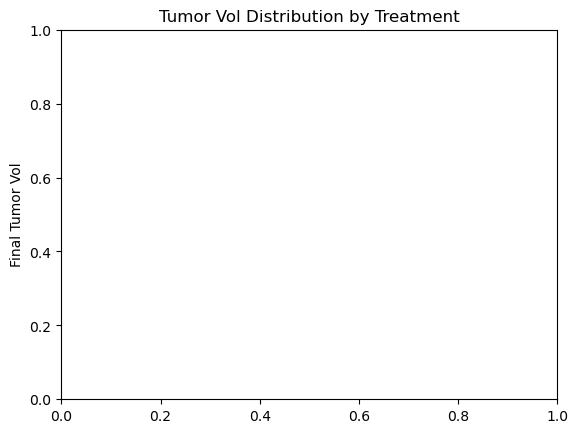

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Vol Distribution by Treatment')
ax1.set_ylabel('Final Tumor Vol')

# Plot the dataframe
data = pd.DataFrame({"Box1": np.random.rand(10), "Box2": np.random.rand(10)})

# Plot the dataframe

ax = final_df[treatments].plot(kind='box', title='Tumor Vol Distribution by Treatment')

ax1.boxplot(final_tumor_vol)
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
final_df.loc['Capomulin']

KeyError: 'Capomulin'

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(final_df['Capomulin']['Weight (g)'],final_df['Capomulin']['Tumor Volume (mm3)'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Median Income")
plt.show()

KeyError: 'Capomulin'

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
